# 機器學習

    讓機器學習透過觀察分辨特徵來分類
    
   - 如何分辨?
       透過大量的資料，產生一個判定的模型

In [39]:
import matplotlib.pyplot as plt

In [40]:
import pandas as pd

In [3]:
import numpy as np

In [41]:
# Loading training data
data = pd.read_csv('regression1.csv')

x = data.iloc[:,0].values  #iloc:根據所在位置，選取行列
y = data.iloc[:,-1].values

# 特徵標準化(normalization)

    將特徵資料按比例縮放、不改變原本分佈，讓資料落在某一特定的區間

>Why?
  
       在比較兩組數據時，可能出現單位不同(身高、體重)或是數字大小的代表性不同(考試100分、滿足感0.8)等各自變化的程度不一，進而影響統計分析結果

In [5]:
# normalization標準化
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
X_std = sc_x.fit_transform(x) #x為一維陣列

#Error, input格式不符合(要二維陣列)

ValueError: Expected 2D array, got 1D array instead:
array=[235. 216. 148.  35.  85. 204.  49.  25. 173. 191. 134.  99. 117. 112.
 162. 272. 159. 159.  59. 198.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [42]:
# normalization標準化
    #標準化:減掉平均值，再除以標準差
    #   → 去除均值，按標準差比例縮放
    
from sklearn.preprocessing import StandardScaler
    #StandardScaler:實現transformer的應用程式接口，能夠計算訓練數據的平均值和標準差，從而在訓練數據集上再次使用
    #   → 零平均值單位標準差
    
sc_x = StandardScaler() 
    #若設置with_mean=False或with_std=False，將不執行中心化或縮放

x1 = x.reshape(-1,1) #將X轉維二維陣列(資料表)
    #reshape(newshape, order='C'):改變形狀，不改變內部元素
    #  newshape:int or int of ints
    #       int:一維陣列
    #       int of ints:(row, col) (注意！新尺寸產生的數值個數要等於原陣列)
    #       若其中一個值為-1，會自動計算這個-1應為多少
    #          p.s.數一下[個數，幾個就是幾維
    #  order:重新分配的順序
    
X_std = sc_x.fit_transform(x1)

C:\Users\vanik\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\vanik\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


---

# np.shape

---

# 線性回歸(Linear Regression)

[線性回歸(Linear Regression)](https://medium.com/@chih.sheng.huang821/%E7%B7%9A%E6%80%A7%E5%9B%9E%E6%AD%B8-linear-regression-3a271a7453e)

[95.56399932]
Slope: 95.564
Intercept: 428.600


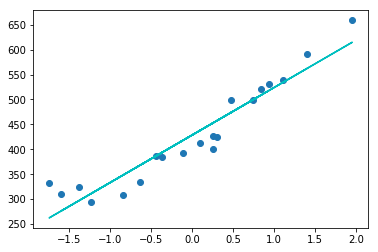

In [43]:
# Linear Regression(normalization)回歸線

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
#用資料去fit model
lr.fit(X_std, y) #X_std:training data
                 #y:target value目標值

#訓練好模型，要去預測看看
y_pred = lr.predict(X_std) #拿x_std去預測y值，保留預測出的y

#先print回歸線系數
print(lr.coef_)
print('Slope: %.3f' % lr.coef_[0]) #斜率(theta_1)
    # %:插入字串格式(一個值), f:浮點數, .3:小數點後三位
print('Intercept: %.3f' % lr.intercept_) #截距(theta_0)

#圖
plt.scatter(X_std, y) #點
plt.plot(X_std, y_pred, 'c') #回歸線

In [44]:
#Computing MSE 和 判定係數(coefficient ofdetermination)

import sklearn.metrics as sm

#拿model預測的值跟真實的值，計算誤差(MSE)
print('MSE: %.3f' % sm.mean_squared_error(y, y_pred))
    # mean_squared_error(y_true, y_pred):均方誤差回歸損失

#R^2:預測值y的變異中有多少百分比，可以由x解釋
print('R^2: %.3f' % sm.r2_score(y, y_pred))
    # r2_score(y_true, y_pred):測量x對y的解釋程度(擬合程度)
    # best:1.0，有可能負

MSE: 978.262
R^2: 0.903


In [45]:
# Polynomial Regression多項式回歸:曲線
    # 最大優點：通過增加x的高次項，對實測點進行逼近
# 將兩者進行比較

from sklearn.preprocessing import PolynomialFeatures

quadratic = PolynomialFeatures(degree=2) #增加二次項
        #PolynomialFeatures:預設degree=2

#將data放入model
x_quad = quadratic.fit_transform(X_std)
x_quad   #可還原為x內積theta
    #h(x) = theta_0 + theta_1*x + theta_2*x^2 轉為三維向量

array([[ 1.        ,  1.39433428,  1.94416809],
       [ 1.        ,  1.11069026,  1.23363286],
       [ 1.        ,  0.09554325,  0.00912851],
       [ 1.        , -1.59139223,  2.53252924],
       [ 1.        , -0.8449606 ,  0.71395842],
       [ 1.        ,  0.93154667,  0.8677792 ],
       [ 1.        , -1.38239138,  1.91100592],
       [ 1.        , -1.74067856,  3.02996185],
       [ 1.        ,  0.46875906,  0.21973506],
       [ 1.        ,  0.73747445,  0.54386856],
       [ 1.        , -0.11345761,  0.01287263],
       [ 1.        , -0.63595975,  0.4044448 ],
       [ 1.        , -0.36724436,  0.13486842],
       [ 1.        , -0.44188752,  0.19526458],
       [ 1.        ,  0.3045441 ,  0.09274711],
       [ 1.        ,  1.94669369,  3.78961632],
       [ 1.        ,  0.25975821,  0.06747433],
       [ 1.        ,  0.25975821,  0.06747433],
       [ 1.        , -1.23310505,  1.52054807],
       [ 1.        ,  0.84197488,  0.70892169]])

In [47]:
#fit linear features 訓練回歸模型

pr = LinearRegression()

#加入二次項後，使用線性回歸的訓練模型
pr.fit(x_quad, y)

#新回歸線預測出的y值
y_quad_pred = pr.predict(x_quad)

print('theta1: %.3f' % pr.coef_[1])  #x係數
print('theta2: %.3f' % pr.coef_[2])  #x^2係數
print('Intercept: %.3f' % pr.intercept_) #模型設定,截距存在pr.intercept_中

theta1: 97.133
theta2: 22.623
Intercept: 405.977


In [48]:
import sklearn.metrics as sm

print('MSE: %.3f' % sm.mean_squared_error(y, y_quad_pred))
print('R^2: %.3f' % sm.r2_score(y, y_quad_pred))

MSE: 377.582
R^2: 0.963


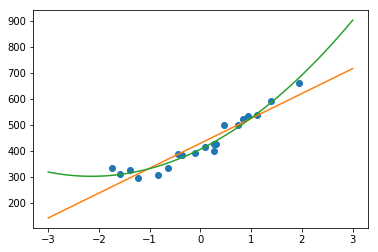

In [49]:
x = np.linspace(-3,3,100) #-3到3,產生100個等差級數的點

plt.plot(X_std, y, 'o') #點

#先設定x為連續值，再將其放入回歸線中畫線
#線是由點畫出的
plt.plot(x, lr.intercept_+lr.coef_[0]*x) #直線
plt.plot(x, pr.intercept_+pr.coef_[1]*x+pr.coef_[2]*x**2) #二次式曲線

---

#### PolynomialFeatures

In [34]:
x = np.arange(4)
x = x.reshape(-1,1)
x

array([[0],
       [1],
       [2],
       [3]])

In [36]:
poly = PolynomialFeatures(3)
poly.fit_transform(x)

array([[ 1.,  0.,  0.,  0.],
       [ 1.,  1.,  1.,  1.],
       [ 1.,  2.,  4.,  8.],
       [ 1.,  3.,  9., 27.]])

In [26]:
y = np.arange(4).reshape(2,2)
y

array([[0, 1],
       [2, 3]])

In [29]:
poly = PolynomialFeatures(2)
poly.fit_transform(y)

array([[1., 0., 1., 0., 0., 1.],
       [1., 2., 3., 4., 6., 9.]])

In [28]:
poly = PolynomialFeatures(2, interaction_only=True)
poly.fit_transform(y)

array([[1., 0., 1., 0.],
       [1., 2., 3., 6.]])

---

In [50]:
##Try 三次方
#模型越複雜fit越好

from sklearn.preprocessing import PolynomialFeatures

cubic = PolynomialFeatures(degree=3)
X_cub = cubic.fit_transform(X_std)

cr = LinearRegression()
cr.fit(X_cub, y)
y_cub_pred = cr.predict(X_cub)
pr.coef_

print('theta1: %.3f' % cr.coef_[1])
print('theta2: %.3f' % cr.coef_[2])
print('theta3: %.3f' % cr.coef_[3])
print('Intercept: %.3f' % cr.intercept_)

theta1: 118.007
theta2: 25.074
theta3: -9.504
Intercept: 402.867


In [51]:
import sklearn.metrics as sm

print('MSE: %.3f' % sm.mean_squared_error(y, y_cub_pred))
print('R^2: %.3f' % sm.r2_score(y, y_cub_pred))

MSE: 272.540
R^2: 0.973


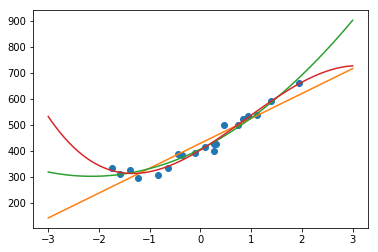

In [52]:
x = np.linspace(-3,3,100)

plt.plot(X_std, y, 'o') #點

plt.plot(x, lr.intercept_+lr.coef_[0]*x) #直線
plt.plot(x, pr.intercept_+pr.coef_[1]*x+pr.coef_[2]*x**2) #二次式曲線
plt.plot(x, cr.intercept_+cr.coef_[1]*x+cr.coef_[2]*x**2+cr.coef_[3]*x**3) #三次式曲線

---

### Multiple regression

In [5]:
#載入數據集

from sklearn.datasets import load_diabetes

data = load_diabetes()
data.keys()

dict_keys(['data', 'target', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])

In [6]:
import pandas as pd

#將資料取出放入dataframe                            
feature = pd.DataFrame(data['data'], columns = data['feature_names']) #columns:行的名字
target = pd.DataFrame(data['target'], columns = ['target']) #自行設定col名稱
df = pd.concat([feature, target], axis = 1) #合併dataframe
        #pd.concat(objs, axis, join, join_axes, ignore_index)
        #   objs:合併對象
        #   axis=0:直向合併; axis=1:橫向合併
        #   join:有兩種模式inner,outer(預設)
        #            outer:直接將沒有的資料用NaN代替
        #            inner:直接將不完整的資料刪除
        #   join_axes:橫向合併時，指定index參考  e.g.join_axes=[df1.index]
        #   ignore_index=True:合併時，可忽略舊的index欄位，改採用自動產生的新index

In [8]:
feature.shape #10個特徵變數

(442, 10)

In [7]:
df.tail(5)

age       sex       bmi        bp        s1        s2        s3  \
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0.050680 -0.015906  0.017282 -0.037344 -0.013840 -0.024993   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
441 -0.045472 -0.044642 -0.073030 -0.081414  0.083740  0.027809  0.173816   

           s4        s5        s6  target  
437 -0.002592  0.031193  0.007207   178.0  
438  0.034309 -0.018118  0.044485   104.0  
439 -0.011080 -0.046879  0.015491   132.0  
440  0.026560  0.044528 -0.025930   220.0  
441 -0.039493 -0.004220  0.003064    57.0

In [10]:
import matplotlib.pyplot as plt

In [11]:
import seaborn as sns  #多維繪圖

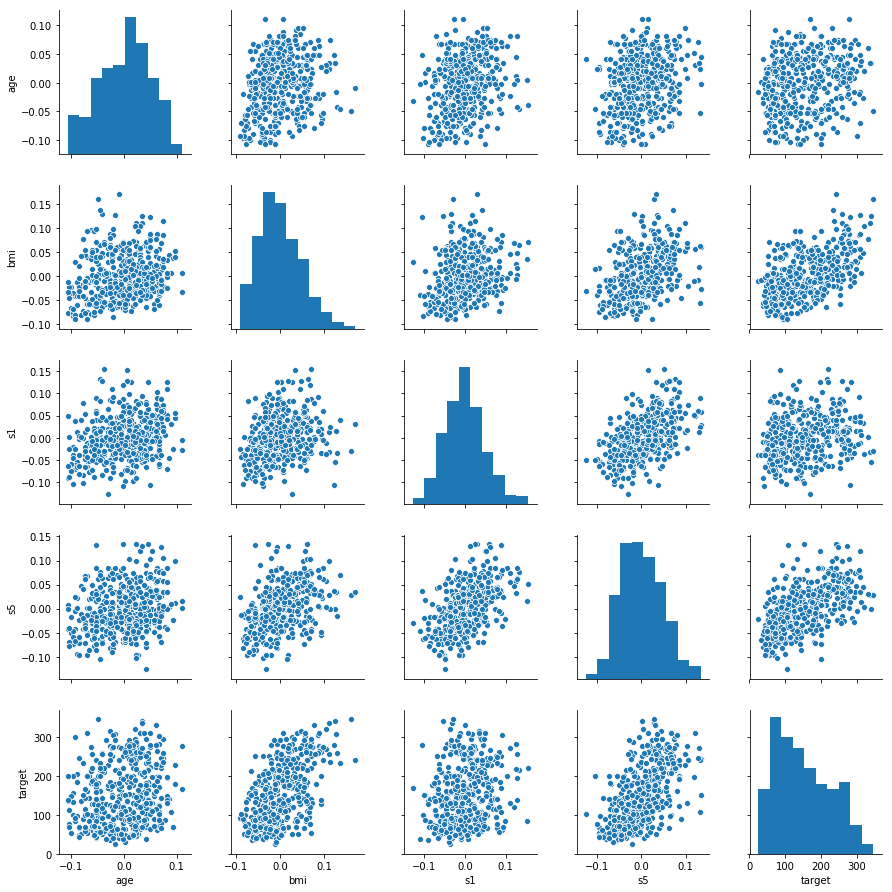

In [14]:
#多變量圖：看彼此之間關係

cols = ['age', 'bmi','s1', 's5', 'target'] #無意思，隨機挑

#繪製多變量圖：觀察feature與target之間關係
sns.pairplot(df[cols])
    #pairplot(變數, hue, palette):多變量圖，繪製成對關係
    #對角線繪製直方圖
    # hue:進一步區分不同變數
    # palette:顏色主題

plt.tight_layout() #避免圖重疊，將其分開

#儲存圖檔
plt.savefig('scatterplot.png', dpi=300)

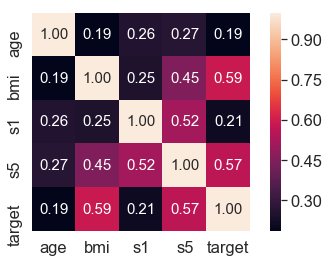

In [21]:
#熱度圖(heat map)：畫出相關關係
#   相關性越低，顏色越深

import numpy as np

cm = np.corrcoef(df[cols].values.T) 
            #.values:將data.frame轉成array(因為np必須要使用array)
            #.T:轉置，行變為列，列變成行
            #  [row, col]，原本data為441x5，轉為5x441
    #np.corrcoef:相關系數，反映變數之間相關關係密切程度的指標
    #  若input為2-D，以row為變量，col為每個觀測值(所以需要轉置)
    
# sns.set(font_scale=1.5) #font_scale:獨立縮放字體元素大小

hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':15}, yticklabels=cols, xticklabels=cols)
    # sns.heatmap(data, cbar, annot, square, fmt, annot_kws, yticklabels, xticklabels)
    #   data:可為array或是dataframe（若為dataframe，其index(row)/column會分別對應到heatmap的column和row，要小心）
    #   cbar:是否在heatmap側邊繪製顏色刻度條，預設為True
    #   annot:是否在每個方格內寫入資料，預設為False
    #       → 若為矩陣，會填入對應位置的資料
    #   square:設定方格為方形，預設為False
    #   fmt:字串格式 e.g.'.2f':浮點數，到小數點後兩位
    #   annot_kws:方格上數字的大小、顏色、字型，要使用{}
    #   xticklabels、yticklabels:標籤名輸出


plt.tight_layout()
plt.savefig('correlation.png', dpi=300)

In [7]:
cm

array([[1.        , 0.18508467, 0.26006082, 0.27077678, 0.18788875],
       [0.18508467, 1.        , 0.24977742, 0.44615865, 0.58645013],
       [0.26006082, 0.24977742, 1.        , 0.51550076, 0.21202248],
       [0.27077678, 0.44615865, 0.51550076, 1.        , 0.56588343],
       [0.18788875, 0.58645013, 0.21202248, 0.56588343, 1.        ]])

# Why normalization

> 提升model精準度

        許多目標函數的基礎，都假設所有的feature都是0平均值，並且具有同一階數上的標準差

>提升收斂速度

In [17]:
# 將dataset分為training set和test set

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

X, y = load_diabetes().data, load_diabetes().target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=8)
    #train_test_split(data, target, random_state):從樣本中隨機的按比例選取train_data和test_data
    #   data:要劃分的feature dataset(樣本特徵集)
    #   target:要劃分的target dataset(目標函數集)
    #   random_state:隨機數的種子

In [15]:
##訓練線性回歸模型，並計算MSE跟R^2

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#訓練模型
slr = LinearRegression()

slr.fit(X_train, y_train)
print(slr.coef_)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

#計算MSE、R^2
print('MSE_train: %.3f, MSE_test: %.3f' % (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))
print('R^2_train: %.3f, R^2_test: %.3f' % (r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)))

[   11.5106203   -282.51347161   534.20455671   401.73142674
 -1043.89718398   634.92464089   186.43262636   204.93373199
   762.47149733    91.9460394 ]
MSE_train: 2812.369, MSE_test: 3108.041
R^2_train: 0.530, R^2_test: 0.459


------------------------------------------------------------

Test:標準化後，MSE、R^2是否會改變      (預想：NO

In [19]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_std = sc.fit_transform(X)

data原本就是標準化後的數據    (是的，不會